In [1]:
%pip install coinmetrics-api-client -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 1.9 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
import pandas as pd
from coinmetrics.api_client import CoinMetricsClient

api_key = userdata.get('api_key')
client = CoinMetricsClient(api_key)


In [3]:
markets = client.reference_data_markets(type='spot').to_dataframe()
markets

,market,exchange,type,base,quote,pair,pool_config_id,contract_address,price_includes_fee,variable_fee,...,order_price_increment,order_price_min,order_price_max,order_size_min,base_native,quote_native,order_taker_fee,order_maker_fee,margin_trading_enabled,fee
0,balancer_v2_eth-1-aave-ampl_eth-spot,balancer_v2_eth,spot,aave,ampl_eth,aave-ampl_eth,1,6b0d50a9df06006170e2d11d468cbfe0f58b43e2,False,False,...,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>
1,balancer_v2_eth-1-aave-crv-spot,balancer_v2_eth,spot,aave,crv,aave-crv,1,3b40d7d5ae25df2561944dd68b252016c4c7b280,True,False,...,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>
2,balancer_v2_eth-1-aave-usdt_eth-spot,balancer_v2_eth,spot,aave,usdt_eth,aave-usdt_eth,1,bd3a698826d27563d08d459faff2d5f6960e21cf,False,False,...,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>
3,balancer_v2_eth-1-alcx-axs_1_eth-spot,balancer_v2_eth,spot,alcx,axs_1_eth,alcx-axs_1_eth,1,7bf521b4f4c1543a622e11ee347efb1a23743322,False,False,...,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>
4,balancer_v2_eth-1-ape-axs_2_eth-spot,balancer_v2_eth,spot,ape,axs_2_eth,ape-axs_2_eth,1,5757b37098d65b097cbcb78e22ae862817a82702,False,False,...,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47070,zb.com-zb-usdt-spot,zb.com,spot,zb,usdt,zb-usdt,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>
47071,zb.com-zkn-usdt-spot,zb.com,spot,zkn,usdt,zkn-usdt,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>
47072,zb.com-zrx-btc-spot,zb.com,spot,zrx,btc,zrx-btc,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>
47073,zb.com-zrx-qc-spot,zb.com,spot,zrx,qc,zrx-qc,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>


In [4]:
my_pairs = [p.lower() for p in ['BTC-EUR', 'ETH-USD', 'BTC-ETH', 'DOG-EUSD']]
my_pairs

['btc-eur', 'eth-usd', 'btc-eth', 'dog-eusd']

In [5]:
relevant = markets[markets.pair.isin(my_pairs)].reset_index(drop=True)
relevant

,market,exchange,type,base,quote,pair,pool_config_id,contract_address,price_includes_fee,variable_fee,...,order_price_increment,order_price_min,order_price_max,order_size_min,base_native,quote_native,order_taker_fee,order_maker_fee,margin_trading_enabled,fee
0,binance-btc-eur-spot,binance,spot,btc,eur,btc-eur,<NA>,NaN,<NA>,<NA>,...,0.01,0.01,1000000.0,5.00000000,BTC,EUR,<NA>,<NA>,<NA>,<NA>
1,binance.us-eth-usd-spot,binance.us,spot,eth,usd,eth-usd,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,NaN,ETH,USD4,<NA>,<NA>,<NA>,<NA>
2,bitfinex-btc-eur-spot,bitfinex,spot,btc,eur,btc-eur,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,NaN,,,<NA>,<NA>,<NA>,<NA>
3,bitfinex-eth-usd-spot,bitfinex,spot,eth,usd,eth-usd,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,NaN,,,<NA>,<NA>,<NA>,<NA>
4,bitflyer-btc-eur-spot,bitflyer,spot,btc,eur,btc-eur,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,NaN,BTC,EUR,<NA>,<NA>,<NA>,<NA>
5,bitflyer-eth-usd-spot,bitflyer,spot,eth,usd,eth-usd,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,NaN,ETH,USD,<NA>,<NA>,<NA>,<NA>
6,bitstamp-btc-eur-spot,bitstamp,spot,btc,eur,btc-eur,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,NaN,BTC,EUR,<NA>,<NA>,<NA>,<NA>
7,bitstamp-eth-usd-spot,bitstamp,spot,eth,usd,eth-usd,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,NaN,ETH,USD,<NA>,<NA>,<NA>,<NA>
8,bittrex-btc-eur-spot,bittrex,spot,btc,eur,btc-eur,<NA>,NaN,<NA>,<NA>,...,0.001,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>
9,bittrex-eth-usd-spot,bittrex,spot,eth,usd,eth-usd,<NA>,NaN,<NA>,<NA>,...,0.001,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>


In [6]:
catalog = client.catalog_market_candles_v2(markets=list(relevant.market)).to_dataframe().merge(relevant.loc[:, ['market','exchange', 'base', 'quote']])
current = catalog.loc[(catalog.frequency=='1m') &
            (catalog.max_time>'2025-03-01')].reset_index(drop=True)
current

,market,frequency,min_time,max_time,exchange,base,quote
0,binance-btc-eur-spot,1m,2020-01-03 08:01:00+00:00,2025-06-12 13:18:00+00:00,binance,btc,eur
1,binance.us-eth-usd-spot,1m,2019-09-23 07:02:00+00:00,2025-06-12 13:18:00+00:00,binance.us,eth,usd
2,bitfinex-btc-eur-spot,1m,2017-05-19 08:16:00+00:00,2025-06-12 13:18:00+00:00,bitfinex,btc,eur
3,bitfinex-eth-usd-spot,1m,2016-03-09 16:04:00+00:00,2025-06-12 13:18:00+00:00,bitfinex,eth,usd
4,bitflyer-btc-eur-spot,1m,2019-05-28 11:50:00+00:00,2025-06-12 13:18:00+00:00,bitflyer,btc,eur
5,bitflyer-eth-usd-spot,1m,2022-11-14 07:06:00+00:00,2025-06-12 13:18:00+00:00,bitflyer,eth,usd
6,bitstamp-btc-eur-spot,1m,2016-04-16 16:55:00+00:00,2025-06-12 13:18:00+00:00,bitstamp,btc,eur
7,bitstamp-eth-usd-spot,1m,2017-08-16 16:45:00+00:00,2025-06-12 13:18:00+00:00,bitstamp,eth,usd
8,bullish-btc-eur-spot,1m,2024-11-08 16:58:00+00:00,2025-06-12 13:18:00+00:00,bullish,btc,eur
9,bullish-eth-usd-spot,1m,2021-11-12 07:24:00+00:00,2025-06-12 13:18:00+00:00,bullish,eth,usd


In [7]:
current.to_csv('markets.csv')

In [ ]:
client.reference_data_asset_metrics().to_dataframe()

,metric,full_name,description,product,category,subcategory,unit,data_type,type,display_name,docs_url,experimental,reviewable,constituent_snapshots_url,constituent_timeframes_url
0,AdrAct30dCnt,"Addresses, active, monthly, count",The sum count of unique addresses that were ac...,Network Data,Addresses,Active,Addresses,bigint,Sum,Active Monthly Addr Cnt,https://docs.coinmetrics.io/network-data/netwo...,NaN,NaN,NaN,NaN
1,AdrAct7dCnt,"Addresses, active, weekly, count",The sum count of unique addresses that were ac...,Network Data,Addresses,Active,Addresses,bigint,Sum,Active Weekly Addr Cnt,https://docs.coinmetrics.io/network-data/netwo...,NaN,NaN,NaN,NaN
2,AdrActBlobCnt,"Addresses, active, blob, count",The sum count of unique addresses that were ac...,Network Data,Transactions,Blobs,Addresses,decimal,Sum,Active Addr Blob Cnt,NaN,False,NaN,NaN,NaN
3,AdrActBlobContRecCnt,"Addresses, active, blob, to contracts, recipie...",The sum count of unique smart contract or burn...,Network Data,Transactions,Blobs,Addresses,decimal,Sum,Active Addr Blob Contract Cnt (Received),NaN,False,NaN,NaN,NaN
4,AdrActBlobRecCnt,"Addresses, active, blob, recipients, count",The sum count of unique addresses that were ac...,Network Data,Transactions,Blobs,Addresses,decimal,Sum,Active Addr Blob Cnt (Received),NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,volume_reported_future_usd_1h,"Volume, reported, future, USD, one hour",The sum of all reported volume from futures ma...,Market Data,Volume,Reported,USD,decimal,Sum,Reported Future Volume,https://docs.coinmetrics.io/market-data/market...,NaN,NaN,NaN,NaN
975,volume_reported_spot_usd_1d,"Volume, reported, spot, USD, one day",The sum of all reported volume from spot marke...,Market Data,Volume,Reported,USD,decimal,Sum,Reported Spot Volume,https://docs.coinmetrics.io/market-data/market...,NaN,NaN,NaN,NaN
976,volume_reported_spot_usd_1h,"Volume, reported, spot, USD, one hour",The sum of all reported volume from spot marke...,Market Data,Volume,Reported,USD,decimal,Sum,Reported Spot Volume,https://docs.coinmetrics.io/market-data/market...,NaN,NaN,NaN,NaN
977,volume_trusted_spot_usd_1d,"Volume, trusted, spot, USD, one day",The sum of all volume from the spot markets of...,Market Data,Volume,Trusted,USD,decimal,Sum,Trusted Spot Volume,https://docs.coinmetrics.io/market-data/market...,NaN,NaN,https://api.coinmetrics.io/v4/constituent-snap...,https://api.coinmetrics.io/v4/constituent-time...


In [9]:
client.catalog_market_contract_prices_v2().to_dataframe()

,market,min_time,max_time
0,binance-1000000BOBUSDT-future,2025-06-05 08:31:00+00:00,2025-06-12 13:55:00+00:00
1,binance-1000000MOGUSDT-future,2024-11-07 12:31:00+00:00,2025-06-12 13:55:00+00:00
2,binance-1000BONKUSDC-future,2024-11-06 11:24:00+00:00,2025-06-12 13:55:00+00:00
3,binance-1000BONKUSDT-future,2024-11-06 11:24:00+00:00,2025-06-12 13:55:00+00:00
4,binance-1000CATUSDT-future,2024-11-06 11:24:00+00:00,2025-06-12 13:55:00+00:00
...,...,...,...
363510,okex-ZIL-USDT-SWAP-future,2025-01-13 12:29:00+00:00,2025-06-12 13:55:00+00:00
363511,okex-ZK-USDT-SWAP-future,2025-01-13 12:29:00+00:00,2025-06-12 13:55:00+00:00
363512,okex-ZKJ-USDT-SWAP-future,2025-01-13 12:29:00+00:00,2025-04-30 07:59:00+00:00
363513,okex-ZRO-USDT-SWAP-future,2025-01-13 12:29:00+00:00,2025-06-12 13:55:00+00:00


In [ ]:
client.reference_data_markets(markets='binance-1000BONKUSDC-future').to_dataframe().iloc[0]

,0
market,binance-1000BONKUSDC-future
exchange,binance
type,future
base,bonk
quote,usdc
pair,bonk-usdc
symbol,1000BONKUSDC
size_asset,bonk
margin_asset,usdc
contract_size,1000.0


In [11]:
catalog_full_market_funding_rates_predicted_v2 = client.catalog_full_market_funding_rates_predicted_v2().to_dataframe()
catalog_full_market_funding_rates_predicted_v2

,market,min_time,max_time
0,binance-1000000BOBUSDT-future,2025-06-05 08:31:00+00:00,2025-06-12 13:45:00+00:00
1,binance-1000000MOGUSDT-future,2024-11-07 12:31:00+00:00,2025-06-12 13:45:00+00:00
2,binance-1000BONKUSDC-future,2024-11-06 11:24:00+00:00,2025-06-12 13:45:00+00:00
3,binance-1000BONKUSDT-future,2024-11-06 11:24:00+00:00,2025-06-12 13:45:00+00:00
4,binance-1000CATUSDT-future,2024-11-06 11:24:00+00:00,2025-06-12 13:45:00+00:00
...,...,...,...
1547,okex-ZIL-USDT-SWAP-future,2025-01-13 12:29:00+00:00,2025-06-12 13:45:00+00:00
1548,okex-ZK-USDT-SWAP-future,2025-01-13 12:29:00+00:00,2025-06-12 13:45:00+00:00
1549,okex-ZKJ-USDT-SWAP-future,2025-01-13 12:29:00+00:00,2025-04-30 07:59:00+00:00
1550,okex-ZRO-USDT-SWAP-future,2025-01-13 12:29:00+00:00,2025-06-12 13:45:00+00:00


In [20]:
catalog_full_market_funding_rates_predicted_v2.loc[catalog_full_market_funding_rates_predicted_v2.max_time > '2025-06-01']

,market,min_time,max_time
0,binance-1000000BOBUSDT-future,2025-06-05 08:31:00+00:00,2025-06-12 13:45:00+00:00
1,binance-1000000MOGUSDT-future,2024-11-07 12:31:00+00:00,2025-06-12 13:45:00+00:00
2,binance-1000BONKUSDC-future,2024-11-06 11:24:00+00:00,2025-06-12 13:45:00+00:00
3,binance-1000BONKUSDT-future,2024-11-06 11:24:00+00:00,2025-06-12 13:45:00+00:00
4,binance-1000CATUSDT-future,2024-11-06 11:24:00+00:00,2025-06-12 13:45:00+00:00
...,...,...,...
1546,okex-ZETA-USDT-SWAP-future,2025-01-13 12:29:00+00:00,2025-06-12 13:45:00+00:00
1547,okex-ZIL-USDT-SWAP-future,2025-01-13 12:29:00+00:00,2025-06-12 13:45:00+00:00
1548,okex-ZK-USDT-SWAP-future,2025-01-13 12:29:00+00:00,2025-06-12 13:45:00+00:00
1550,okex-ZRO-USDT-SWAP-future,2025-01-13 12:29:00+00:00,2025-06-12 13:45:00+00:00


In [27]:
my_markets = _.market.sample(200)
my_markets

,market
490,okex-BAL-USDT-SWAP-future
28,bybit-MICHIUSDT-future
271,binance-IOTXUSDT-future
31,bybit-MICHIUSDT-future
803,okex-CSPR-USDT-SWAP-future
...,...
187,binance-WALUSDT-future
308,binance-ATHUSDT-future
496,binance-MOCAUSDT-future
321,binance-ATHUSDT-future


In [29]:
df = client.get_market_funding_rates(list(set(my_markets)),
                                          #limit_per_market=8*60,
                                          start_time='2025-06-03',
                                          paging_from='start').parallel().to_dataframe()
df.sort_values('database_time')

Exporting to dataframe type: 100%|██████████| 20/20 [00:00<00:00, 92.72it/s]


,market,time,database_time,rate,period,interval
377,okex-ZEREBRO-USDT-SWAP-future,2025-06-03 00:00:00+00:00,2025-06-03 00:00:04.546110+00:00,0.00005,08:00:00,08:00:00
899,okex-ETC-USD-SWAP-future,2025-06-03 00:00:00+00:00,2025-06-03 00:00:06.397034+00:00,0.0001,08:00:00,08:00:00
551,okex-BAL-USDT-SWAP-future,2025-06-03 00:00:00+00:00,2025-06-03 00:00:06.397034+00:00,0.000032,08:00:00,08:00:00
638,okex-DGB-USDT-SWAP-future,2025-06-03 00:00:00+00:00,2025-06-03 00:00:14.213125+00:00,0.0001,08:00:00,08:00:00
725,okex-TAO-USDT-SWAP-future,2025-06-03 00:00:00+00:00,2025-06-03 00:00:14.393805+00:00,0.00005,08:00:00,08:00:00
...,...,...,...,...,...,...
550,binance-SONICUSDT-future,2025-06-12 12:00:00+00:00,2025-06-12 12:02:25.658737+00:00,-0.001723,04:00:00,04:00:00
869,binance-RAREUSDT-future,2025-06-12 12:00:00+00:00,2025-06-12 12:04:35.162739+00:00,-0.000012,04:00:00,04:00:00
86,binance-MEMEUSDT-future,2025-06-12 12:00:00+00:00,2025-06-12 12:05:58.816501+00:00,0.000033,04:00:00,04:00:00
637,binance-ATHUSDT-future,2025-06-12 12:00:00+00:00,2025-06-12 12:06:12.743706+00:00,0.00005,04:00:00,04:00:00


In [23]:
# prompt: Using the DataFrame from the previous cell, calculate the standard deviation of rate_predicted and sort by the standard deviation descending and only show the first 10.

# Assuming 'df' from the previous cell is available.  If not, replace with your actual dataframe.
# If 'rate_predicted' is not a column in your DataFrame, replace with the correct column name.

std_dev_by_market = df.groupby('market')['rate_predicted'].std().reset_index()
std_dev_by_market = std_dev_by_market.sort_values('rate_predicted', ascending=False)
top_10_std_dev = std_dev_by_market.head(10)

top_10_std_dev


,market,rate_predicted
13,okex-ANIME-USDT-SWAP-future,0.003045
14,okex-BAL-USDT-SWAP-future,0.000684
8,binance-SONICUSDT-future,0.000671
16,okex-DGB-USDT-SWAP-future,0.000461
10,binance-WALUSDT-future,0.000369
15,okex-CSPR-USDT-SWAP-future,0.00033
1,binance-IOTXUSDT-future,0.000233
12,bybit-MICHIUSDT-future,0.000177
3,binance-MAVUSDT-future,0.00014
2,binance-JASMYUSDT-future,0.00012


In [24]:
df.groupby('rate_time').size()

,0
rate_time,
2025-06-03 00:00:00+00:00,8
2025-06-03 04:00:00+00:00,2879
2025-06-03 08:00:00+00:00,6693
2025-06-03 12:00:00+00:00,2870
2025-06-03 16:00:00+00:00,6709
2025-06-03 20:00:00+00:00,2879
2025-06-04 00:00:00+00:00,6722
2025-06-04 04:00:00+00:00,2882
2025-06-04 08:00:00+00:00,6713


<ipython-input-25-1493035021>:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Adjust layout to prevent labels from overlapping


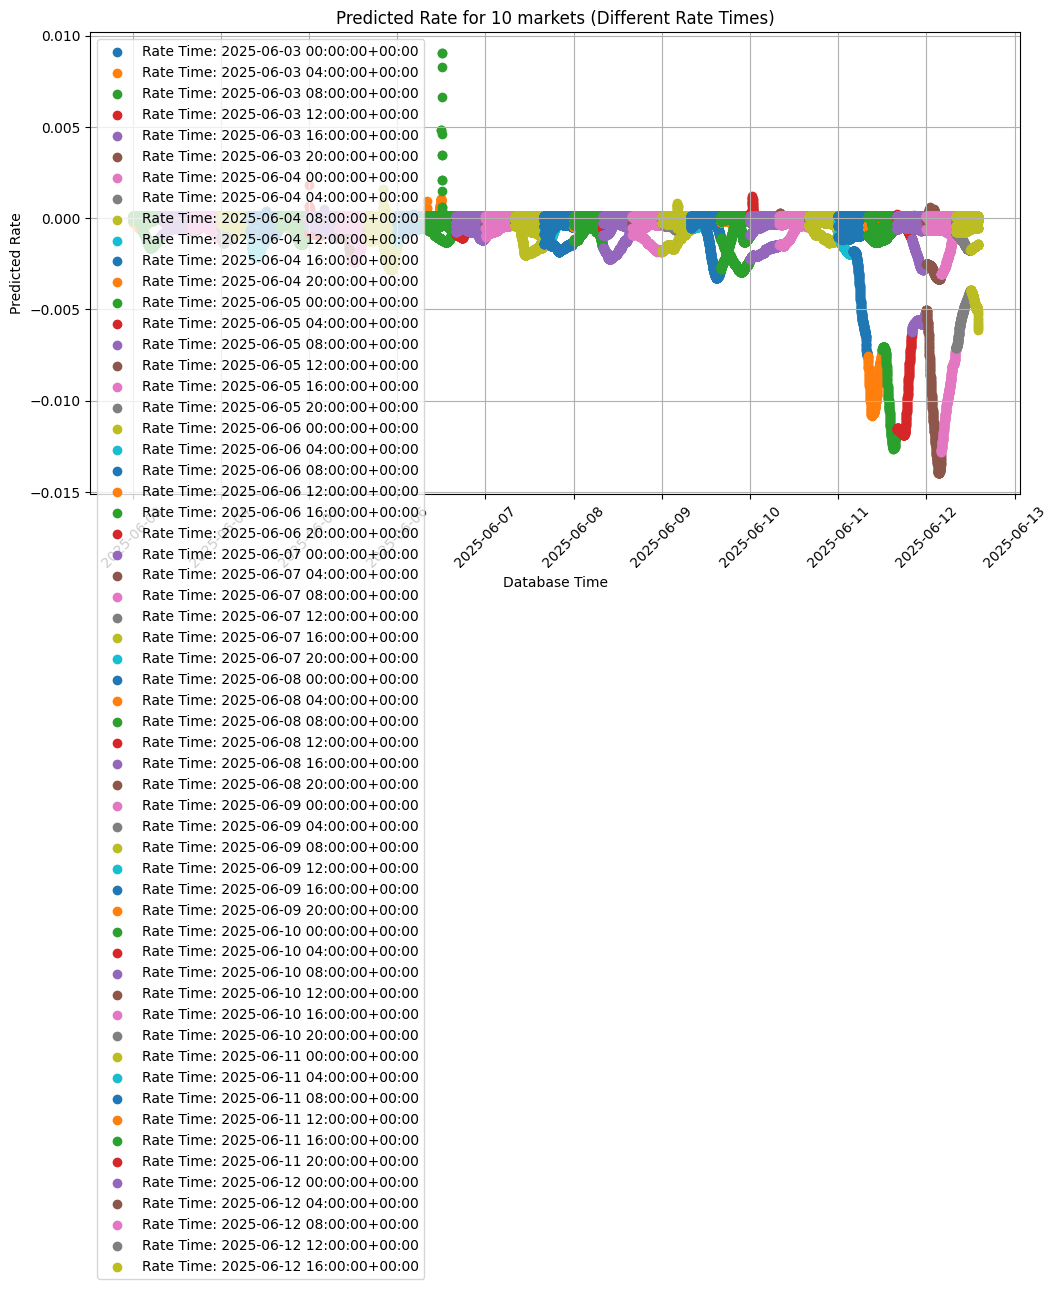

In [25]:
# prompt: For a particular market `binance-NEARUSDC-future`, plot the predicted rate but use a different line for the different rate time. There are five different rate times, so there should be five lines in the plot.

import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame from the previous code snippet
# and it contains the predicted market funding rates data.

# Filter data for the specific market
market_data = df[df['market'].isin(top_10_std_dev.market)]

# Group the data by rate_time
rate_times = market_data.groupby('rate_time')

# Create the plot
plt.figure(figsize=(12, 6))

# Iterate through each rate_time and plot a separate line
for rate_time, data in rate_times:
    plt.scatter(data['database_time'], data['rate_predicted'], label=f'Rate Time: {rate_time}')

# Customize the plot
plt.xlabel('Database Time')
plt.ylabel('Predicted Rate')
plt.title('Predicted Rate for 10 markets (Different Rate Times)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


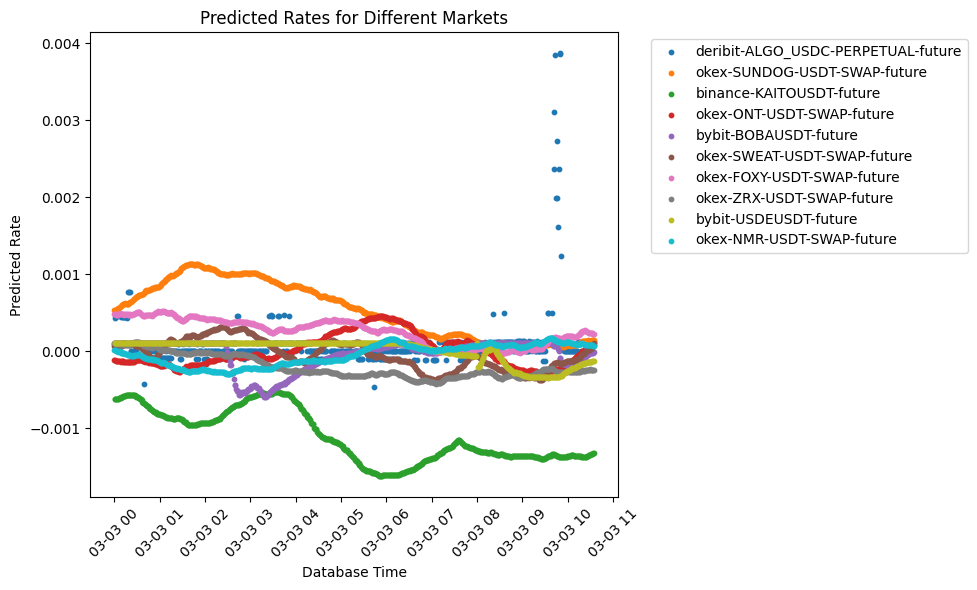

In [ ]:
# prompt: Plot the data obtained in the previous cell with lines using different colors for different markets.  the column is called `rate_predicted ` -- Do not use a line plot. Just plot every single dot as a small dot.
# put the legend outside the plot area

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame from the previous code cells.

plt.figure(figsize=(10, 6))

for market in top_10_std_dev['market'].unique():
    market_df = df[df['market'] == market]
    plt.scatter(market_df['database_time'], market_df['rate_predicted'], label=market, s=10)  # s controls the marker size

plt.xlabel('Database Time')
plt.ylabel('Predicted Rate')
plt.title('Predicted Rates for Different Markets')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside plot area
plt.tight_layout()
plt.show()


In [ ]:
# prompt: same as above, but use plotly express. Use dots to a scatter plot, I guess.

import plotly.express as px

# Assuming 'df' is your DataFrame from the previous code cells.

fig = px.scatter(df.loc[df.market.isin(top_10_std_dev.market)], x='database_time', y='rate_predicted', color='market',
                 title='Predicted Rates for Different Markets',
                 labels={'database_time': 'Database Time', 'rate_predicted': 'Predicted Rate'},
                 hover_data=['market', 'rate_predicted', 'database_time']) # Add hover data for more information

fig.update_traces(marker=dict(size=4)) # Adjust marker size if needed
fig.update_xaxes(tickangle=45) # Rotate x-axis labels
fig.show()
